In [19]:
import os
os.chdir("/Users/leejuan/Documents/GitHub/senior-road-risk-analyzer")
print("✅ 작업 경로 변경 완료:", os.getcwd())


✅ 작업 경로 변경 완료: /Users/leejuan/Documents/GitHub/senior-road-risk-analyzer


/var/folders/0w/lqjy7dfj729d1lm1ynczx3nw0000gn/T/ipykernel_6103/211816631.py:10: DtypeWarning: Columns (20) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)
/var/folders/0w/lqjy7dfj729d1lm1ynczx3nw0000gn/T/ipykernel_6103/211816631.py:22: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mean(), inplace=True)


              precision    recall  f1-score   support

           0       0.82      0.96      0.88     15419
           1       0.49      0.15      0.23      3869

    accuracy                           0.80     19288
   macro avg       0.65      0.55      0.56     19288
weighted avg       0.75      0.80      0.75     19288



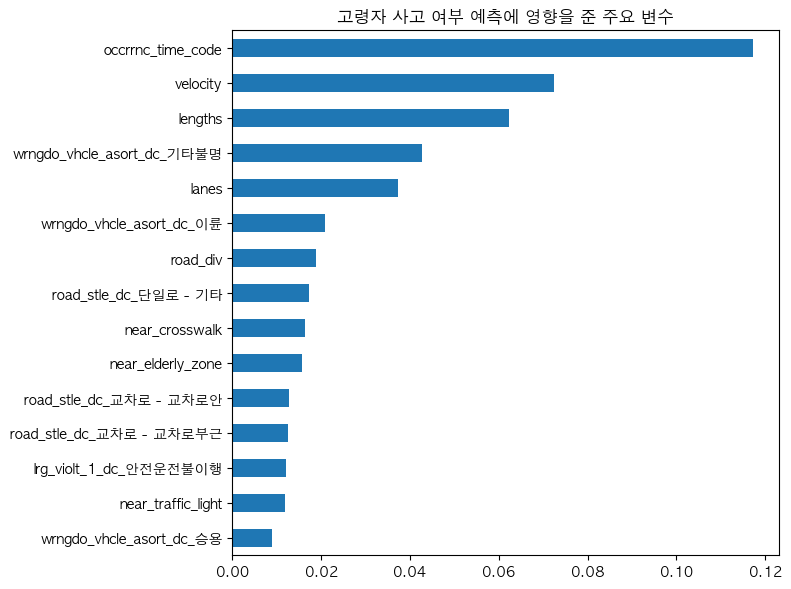

In [20]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import os

# 데이터 경로 설정
file_path = "./data/processed/accident_data_filtered.csv"
df = pd.read_csv(file_path)

# 타겟 변수: 고령자 사고 여부
df["is_elderly_accident"] = df["acdnt_age_1_code"].apply(lambda x: 1 if int(x) >= 65 else 0)

# 자전거 제외
df = df[df["wrngdo_vhcle_asort_dc"] != "자전거"]

# 수치형 처리
for col in ["lanes"]:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors="coerce")
        df[col].fillna(df[col].mean(), inplace=True)

# 피처 선택
features = [
    'occrrnc_time_code', 'acdnt_hdc', 'lrg_violt_1_dc',
    'road_stle_dc', 'wrngdo_vhcle_asort_dc', 'rdse_sttus_dc',
    'road_div', 'near_crosswalk', 'near_traffic_light',
    'near_elderly_zone', 'lanes', 'lengths', 'velocity', 'traffic_volume'
]
features = [f for f in features if f in df.columns]

X = pd.get_dummies(df[features])
y = df["is_elderly_accident"]

# 학습
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = RandomForestClassifier(n_estimators=150, max_depth=None,random_state=42, class_weight="balanced")
model.fit(X_train, y_train)

# 평가
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

# 중요도 시각화
importances = model.feature_importances_
forest_importances = pd.Series(importances, index=X.columns)

forest_importances.sort_values().tail(15).plot(kind='barh', figsize=(8, 6))
plt.title("고령자 사고 여부 예측에 영향을 준 주요 변수")
plt.tight_layout()
plt.show()

In [21]:
print(y.value_counts())
#고령자사고, 비고령자 사고

is_elderly_accident
0    77149
1    19289
Name: count, dtype: int64


In [22]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.96      0.88     15419
           1       0.49      0.15      0.23      3869

    accuracy                           0.80     19288
   macro avg       0.65      0.55      0.56     19288
weighted avg       0.75      0.80      0.75     19288



In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
import itertools

# 사용할 후보 변수 리스트 (원하시는 컬럼으로 바꾸셔도 됩니다!)
feature_candidates = [
    'velocity', 'lanes', 'lengths', 'traffic_volume',
    'road_div', 'wrngdo_vhcle_asort_dc', 'lrg_violt_1_dc',
    'rdse_sttus_dc', 'road_stle_dc', 'near_crosswalk',
    'near_traffic_light', 'near_elderly_zone'
]

# 타겟 설정
df["is_elderly_accident"] = df["acdnt_age_1_code"].apply(lambda x: 1 if int(x) >= 65 else 0)
y = df["is_elderly_accident"]

# 실험 시작: 1개 또는 2개 변수 조합 실험
for r in [1, 2]:  # 1개 또는 2개씩
    for combo in itertools.combinations(feature_candidates, r):
        try:
            X = pd.get_dummies(df[list(combo)], drop_first=True)  # 범주형 인코딩
            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
            
            model = RandomForestClassifier(n_estimators=@00, class_weight='balanced', random_state=42)
            model.fit(X_train, y_train)
            y_pred = model.predict(X_test)
            f1 = f1_score(y_test, y_pred)

            print(f"🧪 사용 변수: {combo} → F1-score: {f1:.4f}")
        except Exception as e:
            print(f"⚠️ {combo} → 에러 발생: {e}")

🧪 사용 변수: ('velocity',) → F1-score: 0.2443
🧪 사용 변수: ('lanes',) → F1-score: 0.2555
🧪 사용 변수: ('lengths',) → F1-score: 0.2420
🧪 사용 변수: ('traffic_volume',) → F1-score: 0.3095
🧪 사용 변수: ('road_div',) → F1-score: 0.3250
🧪 사용 변수: ('wrngdo_vhcle_asort_dc',) → F1-score: 0.3583
🧪 사용 변수: ('lrg_violt_1_dc',) → F1-score: 0.2500
🧪 사용 변수: ('rdse_sttus_dc',) → F1-score: 0.3316
🧪 사용 변수: ('road_stle_dc',) → F1-score: 0.2341
🧪 사용 변수: ('near_crosswalk',) → F1-score: 0.2350
🧪 사용 변수: ('near_traffic_light',) → F1-score: 0.1515
🧪 사용 변수: ('near_elderly_zone',) → F1-score: 0.1441
🧪 사용 변수: ('velocity', 'lanes') → F1-score: 0.2394
🧪 사용 변수: ('velocity', 'lengths') → F1-score: 0.2249
🧪 사용 변수: ('velocity', 'traffic_volume') → F1-score: 0.2773
🧪 사용 변수: ('velocity', 'road_div') → F1-score: 0.2975
🧪 사용 변수: ('velocity', 'wrngdo_vhcle_asort_dc') → F1-score: 0.3515
🧪 사용 변수: ('velocity', 'lrg_violt_1_dc') → F1-score: 0.2980
🧪 사용 변수: ('velocity', 'rdse_sttus_dc') → F1-score: 0.3107
🧪 사용 변수: ('velocity', 'road_stle_dc') → F1-s

In [26]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
import itertools

# 사용할 변수 후보 (행님이 지정한 변수들)
features = [
    'velocity', 'lanes', 'road_div',
    'lrg_violt_1_dc', 'wrngdo_vhcle_asort_dc', 'near_elderly_zone'
]

# 타겟 설정
df["acdnt_age_1_code"] = pd.to_numeric(df["acdnt_age_1_code"], errors="coerce")
df["is_elderly_accident"] = df["acdnt_age_1_code"].apply(lambda x: 1 if x >= 65 else 0)
y = df["is_elderly_accident"]

# 결과 저장용 리스트
results = []

# 실험 시작: 1개 또는 2개 변수 조합 실험
for r in [1, 2]:
    for combo in itertools.combinations(features, r):
        try:
            X = pd.get_dummies(df[list(combo)], drop_first=False)
            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

            model = RandomForestClassifier(
                n_estimators=100,
                class_weight='balanced',
                random_state=42
            )
            model.fit(X_train, y_train)
            y_pred = model.predict(X_test)
            f1 = f1_score(y_test, y_pred, pos_label=1)

            results.append({"features": combo, "f1_score": f1})
        except Exception as e:
            print(f"⚠️ {combo} → 에러 발생: {e}")

# F1-score 기준 정렬 후 출력
sorted_results = sorted(results, key=lambda x: x["f1_score"], reverse=True)

print("\n🎯 상위 F1-score 조합 TOP 10:")
for res in sorted_results[:10]:
    print(f"{res['features']} → F1-score: {res['f1_score']:.4f}")


🎯 상위 F1-score 조합 TOP 10:
('lanes', 'wrngdo_vhcle_asort_dc') → F1-score: 0.3626
('wrngdo_vhcle_asort_dc',) → F1-score: 0.3583
('wrngdo_vhcle_asort_dc', 'near_elderly_zone') → F1-score: 0.3583
('road_div', 'wrngdo_vhcle_asort_dc') → F1-score: 0.3570
('velocity', 'wrngdo_vhcle_asort_dc') → F1-score: 0.3515
('lrg_violt_1_dc', 'wrngdo_vhcle_asort_dc') → F1-score: 0.3292
('road_div',) → F1-score: 0.3250
('road_div', 'near_elderly_zone') → F1-score: 0.3234
('lanes', 'road_div') → F1-score: 0.3173
('lanes', 'lrg_violt_1_dc') → F1-score: 0.3087


In [27]:
import itertools
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

# 👉 1~2개 조합 실험 결과 중 성능이 좋았던 변수 모음
# (예시이므로 실제 상위 결과에 맞게 변수 바꿔주세요!)
top_vars = ['velocity', 'road_div', 'lrg_violt_1_dc', 'lanes', 'wrngdo_vhcle_asort_dc']

# 타겟
df["acdnt_age_1_code"] = pd.to_numeric(df["acdnt_age_1_code"], errors="coerce")
df["is_elderly_accident"] = df["acdnt_age_1_code"].apply(lambda x: 1 if x >= 65 else 0)
y = df["is_elderly_accident"]

results = []

# 👉 3개, 4개 조합으로 확장 실험
for r in [3, 4]:
    for combo in itertools.combinations(top_vars, r):
        try:
            X = pd.get_dummies(df[list(combo)], drop_first=False)
            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

            model = RandomForestClassifier(
                n_estimators=100,
                class_weight='balanced',
                random_state=42
            )
            model.fit(X_train, y_train)
            y_pred = model.predict(X_test)
            f1 = f1_score(y_test, y_pred, pos_label=1)

            results.append({"features": combo, "f1_score": f1})
        except Exception as e:
            print(f"⚠️ {combo} → 에러 발생: {e}")

# 결과 정렬
sorted_results = sorted(results, key=lambda x: x["f1_score"], reverse=True)

# 상위 10개 출력
print("\n🚀 상위 3~4개 변수 조합 TOP 10:")
for res in sorted_results[:10]:
    print(f"{res['features']} → F1-score: {res['f1_score']:.4f}")


🚀 상위 3~4개 변수 조합 TOP 10:
('road_div', 'lanes', 'wrngdo_vhcle_asort_dc') → F1-score: 0.3605
('road_div', 'lrg_violt_1_dc', 'lanes', 'wrngdo_vhcle_asort_dc') → F1-score: 0.3575
('road_div', 'lrg_violt_1_dc', 'wrngdo_vhcle_asort_dc') → F1-score: 0.3571
('lrg_violt_1_dc', 'lanes', 'wrngdo_vhcle_asort_dc') → F1-score: 0.3493
('velocity', 'lanes', 'wrngdo_vhcle_asort_dc') → F1-score: 0.3488
('velocity', 'road_div', 'wrngdo_vhcle_asort_dc') → F1-score: 0.3473
('velocity', 'road_div', 'lanes', 'wrngdo_vhcle_asort_dc') → F1-score: 0.3427
('velocity', 'road_div', 'lrg_violt_1_dc', 'wrngdo_vhcle_asort_dc') → F1-score: 0.3335
('velocity', 'lrg_violt_1_dc', 'wrngdo_vhcle_asort_dc') → F1-score: 0.3236
('velocity', 'lrg_violt_1_dc', 'lanes', 'wrngdo_vhcle_asort_dc') → F1-score: 0.3191


In [28]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import joblib

# 🎯 최종 변수 조합 (여기에 당신의 best 조합 넣으세요!)
final_features = ['velocity', 'road_div', 'lrg_violt_1_dc']

# 🧼 데이터 전처리
df["acdnt_age_1_code"] = pd.to_numeric(df["acdnt_age_1_code"], errors="coerce")
df["is_elderly_accident"] = df["acdnt_age_1_code"].apply(lambda x: 1 if x >= 65 else 0)
X = pd.get_dummies(df[final_features], drop_first=False)
y = df["is_elderly_accident"]

# 🔀 학습/테스트 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 🌲 랜덤포레스트 모델 구성
model = RandomForestClassifier(
    n_estimators=200,
    max_depth=10,
    min_samples_split=5,
    class_weight='balanced',
    random_state=42
)

# 🧠 모델 학습
model.fit(X_train, y_train)

# 🔍 평가
y_pred = model.predict(X_test)
print("🎯 최종 모델 평가결과:")
print(classification_report(y_test, y_pred))

# 💾 모델 저장 (선택)
joblib.dump(model, "final_elderly_accident_model.pkl")
print("✅ 모델 저장 완료: final_elderly_accident_model.pkl")

🎯 최종 모델 평가결과:
              precision    recall  f1-score   support

           0       0.81      0.51      0.62     15419
           1       0.21      0.52      0.30      3869

    accuracy                           0.51     19288
   macro avg       0.51      0.51      0.46     19288
weighted avg       0.69      0.51      0.56     19288

✅ 모델 저장 완료: final_elderly_accident_model.pkl


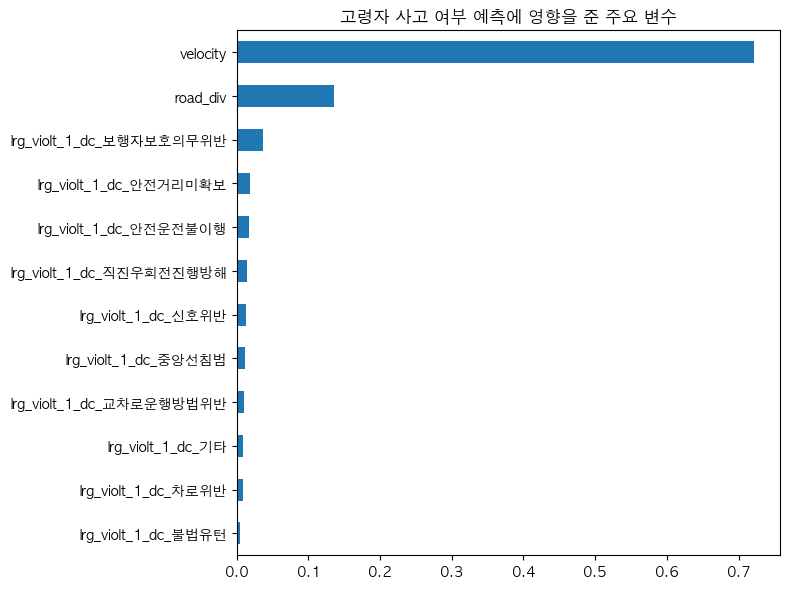

In [32]:
import matplotlib.pyplot as plt
import pandas as pd
import joblib

# 모델 불러오기
model = joblib.load("final_elderly_accident_model.pkl")

# 변수 이름 가져오기 (X에서 사용한 변수들 기준)
X = pd.get_dummies(df[['velocity', 'road_div', 'lrg_violt_1_dc']], drop_first=False)

# 변수 중요도 계산
importances = model.feature_importances_
feature_names = X.columns
forest_importances = pd.Series(importances, index=feature_names)

# 시각화
plt.rcParams['font.family'] = 'AppleGothic'  # Mac 기준 한글 폰트
plt.rcParams['axes.unicode_minus'] = False

forest_importances.sort_values().plot(kind='barh', figsize=(8, 6))
plt.title("고령자 사고 여부 예측에 영향을 준 주요 변수")
plt.tight_layout()
plt.show()

/Users/leejuan/Documents/GitHub/senior-road-risk-analyzer/venv/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 129504 (\N{BRAIN}) missing from font(s) AppleGothic.
  fig.canvas.print_figure(bytes_io, **kw)


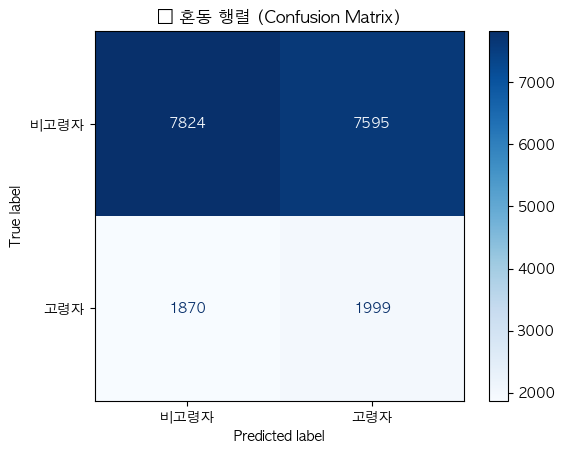

In [33]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred, labels=[0, 1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["비고령자", "고령자"])

disp.plot(cmap='Blues')
plt.title("🧠 혼동 행렬 (Confusion Matrix)")
plt.show()

/Users/leejuan/Documents/GitHub/senior-road-risk-analyzer/venv/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) AppleGothic.
  fig.canvas.print_figure(bytes_io, **kw)


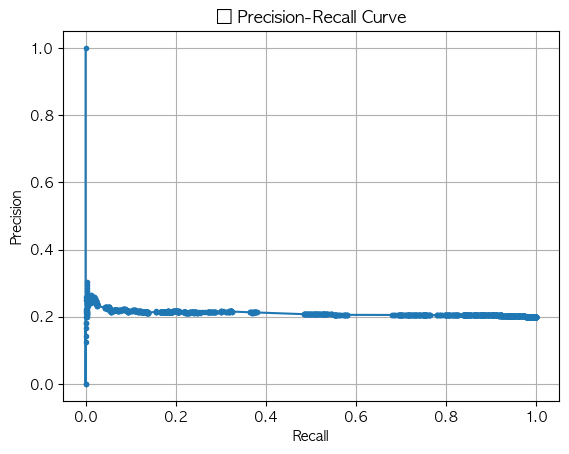

In [ ]:
from sklearn.metrics import precision_recall_curve

y_prob = model.predict_proba(X_test)[:, 1]
precision, recall, thresholds = precision_recall_curve(y_test, y_prob)

plt.plot(recall, precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.grid(True)
plt.show()